In [2]:
#import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn


In [2]:
#device agnostic code
device = 'mps' if torch.backends.mps.is_available() else 'cpu'

In [3]:
device

'mps'

## Make a binary classification dataset from scikitlearn ToyDataset

In [4]:
from sklearn.datasets import make_moons
sample_num = 1000
X,y = make_moons(n_samples = sample_num, noise= 0.15,random_state=42)

In [5]:
X.shape,y.shape

((1000, 2), (1000,))

In [6]:
#dataset description
print(f"Shape of input : {X.shape}\nShape of output: {y.shape}")
print(f"First some data: \n{X[:5]}\nFirst some output: {y[:5]}")

Shape of input : (1000, 2)
Shape of output: (1000,)
First some data: 
[[-0.08156811  0.48221119]
 [ 1.08733336 -0.38115925]
 [ 0.83172491 -0.13313471]
 [ 0.20033884 -0.50030007]
 [-0.82495264  0.53952635]]
First some output: [1 1 1 1 0]


In [7]:
#turn data into a dataframe
df = pd.DataFrame({'X1':X[:,0],
                   'X2':X[:,1],
                   'y': y})

In [8]:
df

,X1,X2,y
0,-0.081568,0.482211,1
1,1.087333,-0.381159,1
2,0.831725,-0.133135,1
3,0.200339,-0.500300,1
4,-0.824953,0.539526,0
...,...,...,...
995,0.823239,0.481376,0
996,-0.179065,0.873266,0
997,1.705934,-0.388526,1
998,-0.990844,0.199451,0


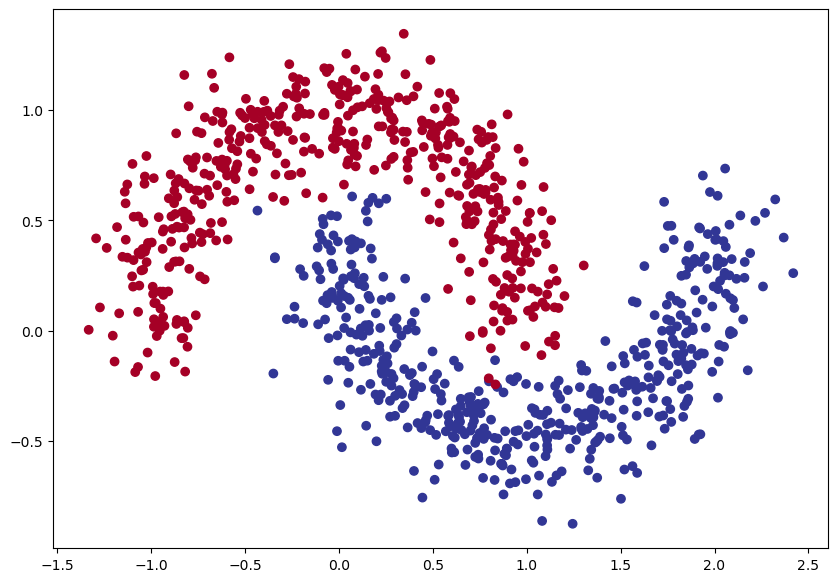

In [9]:
#visualize the data
plt.figure(figsize = (10,7))
plt.scatter(X[:,0],X[:,1],c=y,
           cmap = plt.cm.RdYlBu)

In [10]:
!sysctl -a | grep gpu


debug.iogpu.wired_lwm_mb: 0
debug.iogpu.dynamic_lwm: 1
debug.iogpu.wired_limit: 0
debug.iogpu.rsrc_limit: 0
iogpu.wired_lwm_mb: 0
iogpu.dynamic_lwm: 1
iogpu.wired_limit_mb: 0
iogpu.rsrc_limit: 0
iogpu.debug_flags: 0
iogpu.disable_wired_collector: 0


In [11]:
#turn the data into tensors and split the data
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

#split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)


In [12]:
#check the shape
print(f"X train shape: {X_train.shape} | \ny train shape: {y_train.shape} | \nX_test shape: {X_test.shape} | \ny_test shape : {y_test.shape}")

X train shape: torch.Size([800, 2]) | 
y train shape: torch.Size([800]) | 
X_test shape: torch.Size([200, 2]) | 
y_test shape : torch.Size([200])


## Model Creation

In [13]:
class ClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
        nn.Linear(in_features=2,
                  out_features=5),
        nn.Linear(in_features=5,
                  out_features = 1)
        )
        self.activation = nn.Sigmoid()

    def forward(self,x):
        return self.model(x)

In [14]:
class ClassificationModelv2(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
        nn.Linear(in_features=2,
                  out_features=5),
        nn.ReLU(),
        nn.Linear(in_features=5,
                  out_features = 1),
        nn.Sigmoid()
        )
        
        self.activation = nn.Sigmoid()

    def forward(self,x):
        return self.model(x)

In [15]:
class ClassificationModelv3(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
        nn.Linear(in_features=2,
                  out_features=8),
        nn.ReLU(),
        nn.Linear(in_features=8,
                  out_features = 5),
        nn.ReLU(),
        
        nn.Linear(in_features=5,
                  out_features = 1),
        nn.Sigmoid()
        )
        
        self.activation = nn.Sigmoid()

    def forward(self,x):
        return self.model(x)

model_03 = ClassificationModelv3()
model_03.to(device)

ClassificationModelv3(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (activation): Sigmoid()
)

In [16]:
torch.manual_seed(42)
model_01 = ClassificationModel()
model_01.to(device)

ClassificationModel(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
  (activation): Sigmoid()
)

In [17]:
torch.manual_seed(42)
model_02 = ClassificationModelv2()
model_02.to(device)

ClassificationModelv2(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=1, bias=True)
    (3): Sigmoid()
  )
  (activation): Sigmoid()
)

In [18]:
model_01.state_dict()

OrderedDict([('model.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='mps:0')),
             ('model.0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='mps:0')),
             ('model.1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='mps:0')),
             ('model.1.bias', tensor([-0.2060], device='mps:0'))])

In [19]:
model_02.state_dict()

OrderedDict([('model.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='mps:0')),
             ('model.0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='mps:0')),
             ('model.2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='mps:0')),
             ('model.2.bias', tensor([-0.2060], device='mps:0'))])

In [20]:
with torch.no_grad():
    y_init = model_01(X_train.to(device))
y_init[:5]

tensor([[-0.0428],
        [-0.1720],
        [-0.0963],
        [-0.0992],
        [-0.1394]], device='mps:0')

In [21]:
with torch.no_grad():
    y_init = model_01(X_train.to(device))
torch.sigmoid(y_init[:5])

tensor([[0.4893],
        [0.4571],
        [0.4759],
        [0.4752],
        [0.4652]], device='mps:0')

In [22]:
with torch.no_grad():
    y_init_2  = model_02(X_train.to(device))
y_init_2[:5]

tensor([[0.4641],
        [0.4735],
        [0.4861],
        [0.4814],
        [0.4639]], device='mps:0')

In [23]:
#optimizer and loss function
loss_fn = nn.BCEWithLogitsLoss()

#optimizer
optimizer = torch.optim.SGD(model_01.parameters(),
                           lr = 0.01)


In [24]:
#accuracy function
!pip -q install torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task='multiclass',num_classes =2).to(device)
acc_fn

MulticlassAccuracy()

In [25]:
y_train.shape

torch.Size([800])

In [26]:
X_train.shape

torch.Size([800, 2])

## Train Loop

In [27]:
#train loop
#pass the data into device
torch.manual_seed(42)
X_train ,y_train = X_train.to(device).squeeze(),y_train.to(device).squeeze()
X_test ,y_test = X_test.to(device).squeeze(),y_test.to(device).squeeze()
epochs = 300
for epoch in range(epochs):
    model_01.train()
    #forward pass
    train_logits = model_01(X_train).squeeze()

    train_pred_probs = torch.sigmoid(train_logits)
    train_pred = torch.round(train_pred_probs)

    #calculate loss and accuracy
    train_loss = loss_fn(train_logits,y_train)
    acc = acc_fn(y_train.int(),train_pred.int())

    #zero the gradient
    optimizer.zero_grad()

    #backward propagation
    train_loss.backward()

    #step the optimizer
    optimizer.step()

    model_01.eval()
    with torch.inference_mode():

        #forward pass
        test_logit = model_01(X_test).squeeze()

        test_prob = torch.sigmoid(test_logit)
        test_pred = torch.round(test_prob)
        
        
        #calculate loss
        test_loss = loss_fn(test_logit,y_test)
        test_acc = acc_fn(y_test, test_pred.int())

    if epoch%20 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.3f} | Test Loss: {test_loss:.3f} | Train Acc: {acc:.3f} | Test Acc: {test_acc:.3f}")
            
            
            

Epoch: 0 | Train Loss: 0.694 | Test Loss: 0.694 | Train Acc: 0.500 | Test Acc: 0.500
Epoch: 20 | Train Loss: 0.665 | Test Loss: 0.667 | Train Acc: 0.720 | Test Acc: 0.715
Epoch: 40 | Train Loss: 0.639 | Test Loss: 0.643 | Train Acc: 0.762 | Test Acc: 0.760
Epoch: 60 | Train Loss: 0.616 | Test Loss: 0.622 | Train Acc: 0.781 | Test Acc: 0.750
Epoch: 80 | Train Loss: 0.594 | Test Loss: 0.601 | Train Acc: 0.791 | Test Acc: 0.760
Epoch: 100 | Train Loss: 0.574 | Test Loss: 0.583 | Train Acc: 0.799 | Test Acc: 0.760
Epoch: 120 | Train Loss: 0.555 | Test Loss: 0.565 | Train Acc: 0.804 | Test Acc: 0.770
Epoch: 140 | Train Loss: 0.537 | Test Loss: 0.549 | Train Acc: 0.805 | Test Acc: 0.770
Epoch: 160 | Train Loss: 0.521 | Test Loss: 0.534 | Train Acc: 0.808 | Test Acc: 0.775
Epoch: 180 | Train Loss: 0.505 | Test Loss: 0.519 | Train Acc: 0.809 | Test Acc: 0.775
Epoch: 200 | Train Loss: 0.491 | Test Loss: 0.506 | Train Acc: 0.811 | Test Acc: 0.775
Epoch: 220 | Train Loss: 0.477 | Test Loss: 0.493

In [28]:
#train loop
#pass the data into device
torch.manual_seed(42)
X_train ,y_train = X_train.to(device).squeeze(),y_train.to(device).squeeze()
X_test ,y_test = X_test.to(device).squeeze(),y_test.to(device).squeeze()
epochs = 300
loss_fn_2 = nn.BCELoss()
optimizer2 = torch.optim.Adam(model_02.parameters(),
                            lr = 0.01)
for epoch in range(epochs):
    model_02.train()
    #forward pass
    train_logits = model_02(X_train).squeeze()

    
    train_pred = torch.round(train_logits)

    #calculate loss and accuracy
    train_loss = loss_fn_2(train_logits,y_train)
    acc = acc_fn(y_train.int(),train_pred.int())

    #zero the gradient
    optimizer2.zero_grad()

    #backward propagation
    train_loss.backward()

    #step the optimizer
    optimizer2.step()

    model_02.eval()
    with torch.inference_mode():

        #forward pass
        test_logit = model_02(X_test).squeeze()

        
        test_pred = torch.round(test_logit)
        
        
        #calculate loss
        test_loss = loss_fn_2(test_logit,y_test)
        test_acc = acc_fn(y_test, test_pred.int())

    if epoch%20 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.3f} | Test Loss: {test_loss:.3f} | Train Acc: {acc:.3f} | Test Acc: {test_acc:.3f}")
            
            
            

Epoch: 0 | Train Loss: 0.701 | Test Loss: 0.693 | Train Acc: 0.500 | Test Acc: 0.500
Epoch: 20 | Train Loss: 0.560 | Test Loss: 0.565 | Train Acc: 0.812 | Test Acc: 0.790
Epoch: 40 | Train Loss: 0.420 | Test Loss: 0.433 | Train Acc: 0.834 | Test Acc: 0.815
Epoch: 60 | Train Loss: 0.327 | Test Loss: 0.337 | Train Acc: 0.846 | Test Acc: 0.840
Epoch: 80 | Train Loss: 0.292 | Test Loss: 0.298 | Train Acc: 0.865 | Test Acc: 0.850
Epoch: 100 | Train Loss: 0.278 | Test Loss: 0.279 | Train Acc: 0.874 | Test Acc: 0.855
Epoch: 120 | Train Loss: 0.272 | Test Loss: 0.271 | Train Acc: 0.873 | Test Acc: 0.860
Epoch: 140 | Train Loss: 0.270 | Test Loss: 0.267 | Train Acc: 0.873 | Test Acc: 0.860
Epoch: 160 | Train Loss: 0.269 | Test Loss: 0.265 | Train Acc: 0.873 | Test Acc: 0.860
Epoch: 180 | Train Loss: 0.269 | Test Loss: 0.264 | Train Acc: 0.874 | Test Acc: 0.860
Epoch: 200 | Train Loss: 0.269 | Test Loss: 0.264 | Train Acc: 0.874 | Test Acc: 0.860
Epoch: 220 | Train Loss: 0.268 | Test Loss: 0.264

In [29]:
#train loop
#pass the data into device
torch.manual_seed(42)
X_train ,y_train = X_train.to(device).squeeze(),y_train.to(device).squeeze()
X_test ,y_test = X_test.to(device).squeeze(),y_test.to(device).squeeze()
epochs = 300
loss_fn_3 = nn.BCELoss()
optimizer3 = torch.optim.Adam(model_03.parameters(),
                            lr = 0.01)
for epoch in range(epochs):
    model_03.train()
    #forward pass
    train_logits = model_03(X_train).squeeze()

    
    train_pred = torch.round(train_logits)

    #calculate loss and accuracy
    train_loss = loss_fn_3(train_logits,y_train)
    acc = acc_fn(y_train.int(),train_pred.int())

    #zero the gradient
    optimizer3.zero_grad()

    #backward propagation
    train_loss.backward()

    #step the optimizer
    optimizer3.step()

    model_03.eval()
    with torch.inference_mode():

        #forward pass
        test_logit = model_03(X_test).squeeze()

        
        test_pred = torch.round(test_logit)
        
        
        #calculate loss
        test_loss = loss_fn_3(test_logit,y_test)
        test_acc = acc_fn(y_test, test_pred.int())

    if epoch%20 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.3f} | Test Loss: {test_loss:.3f} | Train Acc: {acc:.3f} | Test Acc: {test_acc:.3f}")
            
            
            

Epoch: 0 | Train Loss: 0.701 | Test Loss: 0.693 | Train Acc: 0.500 | Test Acc: 0.500
Epoch: 20 | Train Loss: 0.508 | Test Loss: 0.500 | Train Acc: 0.851 | Test Acc: 0.845
Epoch: 40 | Train Loss: 0.298 | Test Loss: 0.298 | Train Acc: 0.861 | Test Acc: 0.850
Epoch: 60 | Train Loss: 0.275 | Test Loss: 0.266 | Train Acc: 0.877 | Test Acc: 0.880
Epoch: 80 | Train Loss: 0.268 | Test Loss: 0.262 | Train Acc: 0.876 | Test Acc: 0.870
Epoch: 100 | Train Loss: 0.262 | Test Loss: 0.256 | Train Acc: 0.881 | Test Acc: 0.875
Epoch: 120 | Train Loss: 0.254 | Test Loss: 0.246 | Train Acc: 0.887 | Test Acc: 0.890
Epoch: 140 | Train Loss: 0.247 | Test Loss: 0.240 | Train Acc: 0.890 | Test Acc: 0.895
Epoch: 160 | Train Loss: 0.242 | Test Loss: 0.236 | Train Acc: 0.891 | Test Acc: 0.900
Epoch: 180 | Train Loss: 0.238 | Test Loss: 0.233 | Train Acc: 0.886 | Test Acc: 0.900
Epoch: 200 | Train Loss: 0.236 | Test Loss: 0.232 | Train Acc: 0.885 | Test Acc: 0.900
Epoch: 220 | Train Loss: 0.234 | Test Loss: 0.231

## Make Prediction with trained model and plot them using plot_decision_boundary

In [93]:
#plot the model prediction

def plot_decision_boundary(model,X,y):

    #put everything to CPU (works better with NumPy and Matplotlib)

    model.to("cpu")
    X,y = X.to("cpu"),y.to("cpu")

    #now make a grid aka a graph paper and X, y plane
    x_min, x_max = X[:,0].min() -0.1,X[:,0].max()+0.1 #plot the first feature along with X axis
    y_min, y_max = X[:,1].min() -0.1,X[:,1].max()+0.1 #plot the second feature along with y axis

    xx,yy = np.meshgrid(np.linspace(x_min,x_max,101),
                       np.linspace(y_min, y_max, 101))



    #make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(),yy.ravel()))).float()

    #make predictions:
    model.eval()
    with torch.inference_mode():
        pred = model(X_to_pred_on)


    #test for binary class or multiclass and adjust logits to prediction labels
    if len(torch.unique(y))>2:
        y_pred = torch.softmax(pred,dim = 1).argmax(dim =1)
    else:
        y_pred = torch.round(pred)


    #reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx,yy,y_pred,cmap= plt.cm.RdYlBu,alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
        


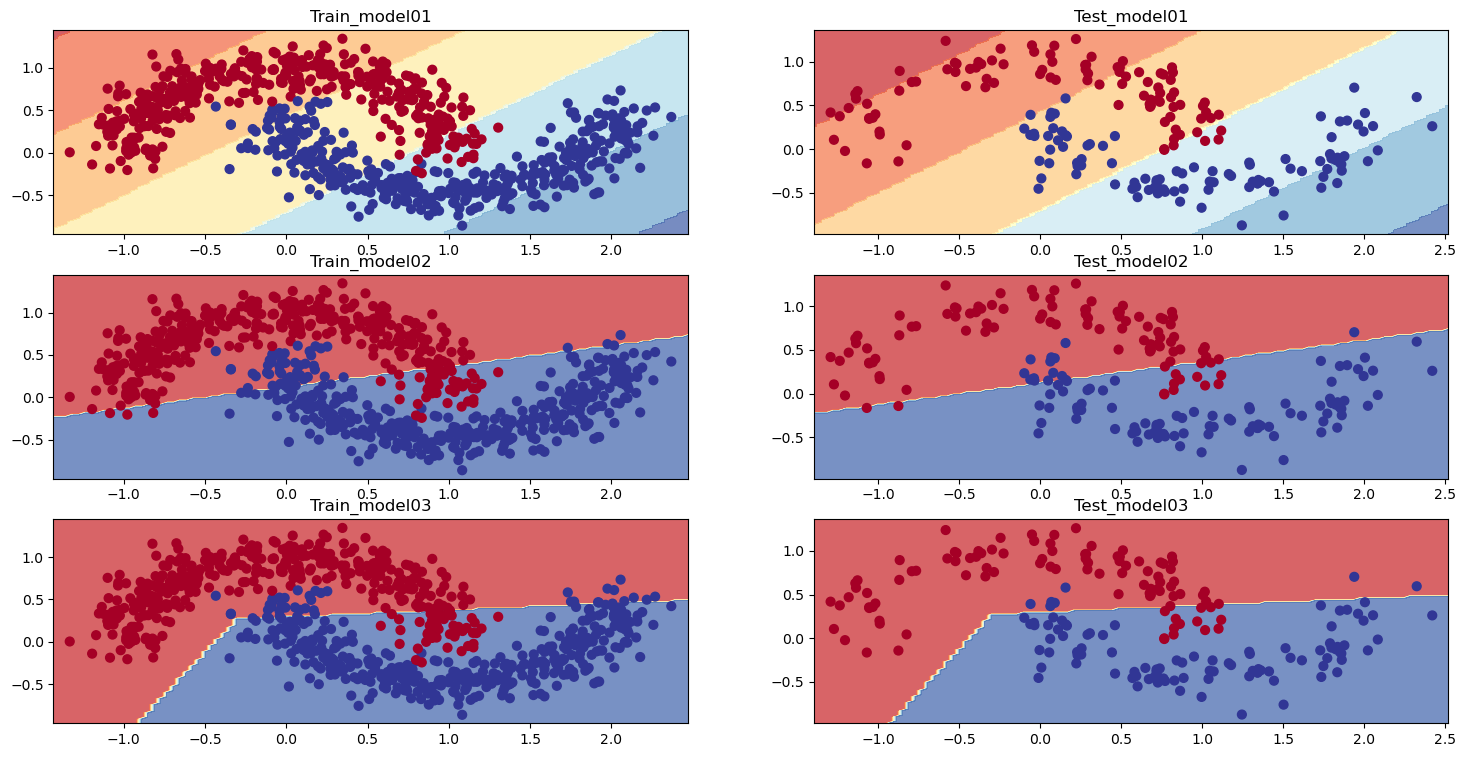

In [31]:
#plot decision boundary
plt.figure(figsize = (18,9))
plt.subplot(3,2,1)
plt.title('Train_model01')
plot_decision_boundary(model_01,X_train,y_train)
plt.subplot(3,2,2)
plt.title('Test_model01')
plot_decision_boundary(model_01,X_test,y_test)
plt.subplot(3,2,3)
plt.title('Train_model02')
plot_decision_boundary(model_02,X_train,y_train)
plt.subplot(3,2,4)
plt.title('Test_model02')
plot_decision_boundary(model_02,X_test,y_test)
plt.subplot(3,2,5)
plt.title('Train_model03')
plot_decision_boundary(model_03,X_train,y_train)
plt.subplot(3,2,6)
plt.title('Test_model03')
plot_decision_boundary(model_03,X_test,y_test)


In [32]:
a = np.arange(1,10)
b = np.arange(1,10)
a,b

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [33]:
xx,yy = np.meshgrid(np.linspace(1,9,20),
                   np.linspace(3,8,20))


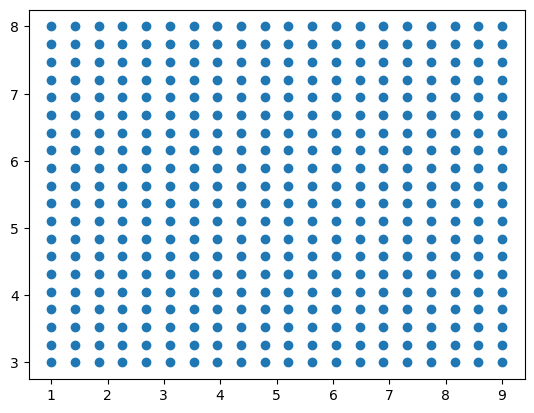

In [34]:
plt.scatter(xx,yy)


In [35]:
xx,yy

(array([[1.        , 1.42105263, 1.84210526, 2.26315789, 2.68421053,
         3.10526316, 3.52631579, 3.94736842, 4.36842105, 4.78947368,
         5.21052632, 5.63157895, 6.05263158, 6.47368421, 6.89473684,
         7.31578947, 7.73684211, 8.15789474, 8.57894737, 9.        ],
        [1.        , 1.42105263, 1.84210526, 2.26315789, 2.68421053,
         3.10526316, 3.52631579, 3.94736842, 4.36842105, 4.78947368,
         5.21052632, 5.63157895, 6.05263158, 6.47368421, 6.89473684,
         7.31578947, 7.73684211, 8.15789474, 8.57894737, 9.        ],
        [1.        , 1.42105263, 1.84210526, 2.26315789, 2.68421053,
         3.10526316, 3.52631579, 3.94736842, 4.36842105, 4.78947368,
         5.21052632, 5.63157895, 6.05263158, 6.47368421, 6.89473684,
         7.31578947, 7.73684211, 8.15789474, 8.57894737, 9.        ],
        [1.        , 1.42105263, 1.84210526, 2.26315789, 2.68421053,
         3.10526316, 3.52631579, 3.94736842, 4.36842105, 4.78947368,
         5.21052632, 5.63157895

In [36]:
xx.shape,yy.shape

((20, 20), (20, 20))

In [37]:
xx.ravel().shape

(400,)

In [38]:
device

'mps'

In [39]:
a = torch.rand((3,2))
b = torch.rand((3,2))
torch.eq(a,b).sum().item()

0

In [40]:
a = np.array([[2,3],[4,5]])

In [41]:
a

array([[2, 3],
       [4, 5]])

In [42]:
a.ravel()

array([2, 3, 4, 5])

In [43]:
b = np.array([[4,6],[10,12]])


In [44]:
b

array([[ 4,  6],
       [10, 12]])

In [45]:
np.column_stack((a,b))

array([[ 2,  3,  4,  6],
       [ 4,  5, 10, 12]])

In [46]:
np.column_stack((a.ravel(),b.ravel()))

array([[ 2,  4],
       [ 3,  6],
       [ 4, 10],
       [ 5, 12]])

In [47]:
np.row_stack((a.ravel(),b.ravel()))

array([[ 2,  3,  4,  5],
       [ 4,  6, 10, 12]])

# MultiClass Classification

## Create the datasets

In [ ]:
import numpy as np

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

N = 100 #NUMBER OF POINTS PER CLASS
D = 2 #DIMENSIONALITY --> NUMBER OF FEATURES
K = 3 #NUMBER OF CLASS
X = np.zeros((N*K,D))
y = np.zeros((N*K),dtype = 'uint8')

for j in range(K):
    ix = range(N*K,N*(j+1))
    r = np.linspace(0.0,1,N)


In [5]:
#empty dataset
x = np.zeros((300,2))

In [6]:
x

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [7]:
y = np.zeros(300)

In [8]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [9]:
for j in range(3):
    ix = range()
    print(j)

0
1
2


In [10]:
ix = range(0,100)

In [11]:
ix

range(0, 100)

In [12]:
a = np.linspace(0.0,1,100)
a

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

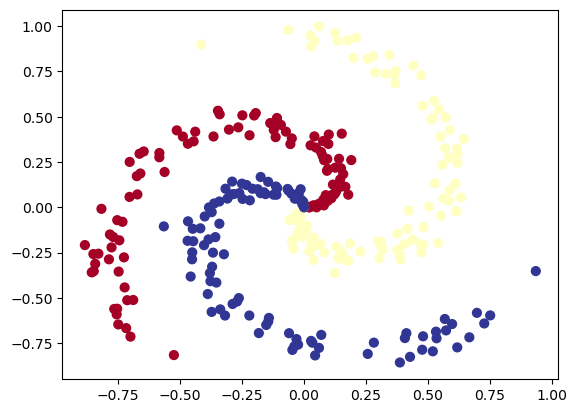

In [25]:
# new dataset creation
n_samples = 100
n_class = 3
dimension = 2

#create empty dataset
x = np.zeros((n_samples*n_class,dimension)) 
y= np.zeros((n_samples*n_class))

#data creation 
#for each class
for j in range(n_class):
    ix = range(j*n_samples,(j+1)*n_samples) #for 1st class index = 0-100, for 2nd = 100-200, for 3rd 200-300
    r = np.linspace(0,1,n_samples) #radius
    t = np.linspace(j*4, (j+1)*4,n_samples)+np.random.randn(100)*0.2 #theta
    x[ix]= np.c_[r*np.cos(t), r*np.sin(t)]
    y[ix] = j

#visualize the data
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [16]:
x.shape, y.shape

((300, 2), (300,))

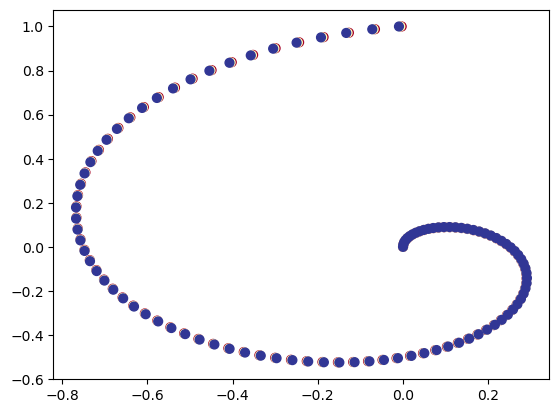

In [20]:
'''# new dataset creation
n_class = 3
n_samples = 100
dimension = 2

#create empty dataset
x = np.zeros((n_samples*n_class,dimension)) 
y= np.zeros((n_samples*n_class))

#data creation 
#for each class
for j in range(n_class):
    ix = range(j*n_samples,(j+1)*n_samples) #for 1st class index = 0-100, for 2nd = 100-200, for 3rd 200-300
    r = np.linspace(0.0,1,n_samples) #radius
    t = np.linspace(j*6.28, (j+1)*6.28,n_samples) #theta
    x[ix]= np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

#visualize the data
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()'''

In [27]:
x.shape, y.shape

((300, 2), (300,))

In [28]:
x[:5]

array([[ 0.        ,  0.        ],
       [ 0.00934494,  0.00383439],
       [ 0.02018976, -0.00070374],
       [ 0.02989831,  0.00493608],
       [ 0.03875559,  0.01142324]])

In [29]:
y[:5]

array([0., 0., 0., 0., 0.])

In [41]:
np.unique(y).sum()

3.0

In [31]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state=42,shuffle=True)

In [32]:
X_train.shape

(240, 2)

In [33]:
#turn the data into tensors
X_train,X_test = torch.tensor(X_train, dtype= torch.float32),torch.tensor(X_test, dtype= torch.float32)
y_train,y_test = torch.tensor(y_train, dtype= torch.float32),torch.tensor(y_test, dtype= torch.float32)

In [34]:
X_train.dtype

torch.float32

In [35]:
X_train[:5],y_train[:5]

(tensor([[-0.2902,  0.1423],
         [-0.5631,  0.1952],
         [ 0.0580,  0.0176],
         [ 0.2564,  0.8194],
         [ 0.4788,  0.5607]]),
 tensor([2., 0., 0., 1., 1.]))

In [38]:
# device agnostic code
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'mps'

## Model Creation 

In [80]:
class MultiClassClassification(nn.Module):
    def __init__(self):
        super().__init__()
        self.model= nn.Sequential(
            nn.Linear(in_features = 2,
                     out_features=12),
            nn.ReLU(),
            nn.Linear(in_features = 12,
                     out_features=10),
            nn.ReLU(),
            nn.Linear(in_features = 10,
                     out_features=3),
            
            
        )

    def forward(self, x):
        return self.model(x)

In [81]:
torch.manual_seed(42)
multi_model = MultiClassClassification()
multi_model.to(device)

MultiClassClassification(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=3, bias=True)
  )
)

In [82]:
multi_model.state_dict()

OrderedDict([('model.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691]], device='mps:0')),
             ('model.0.bias',
              tensor([-0.5582, -0.3260, -0.1997, -0.4252,  0.0667, -0.6984,  0.6386, -0.6007,
                       0.5459,  0.1177, -0.2296,  0.4370], device='mps:0')),
             ('model.2.weight',
              tensor([[ 0.0450,  0.2332,  0.0316, -0.0910,  0.0776, -0.0783,  0.1215,  0.2577,
                        0.1669, -0.1262,  0.1666,  0.0517],
                      [ 0.1466, -0.1759, -0.2858, -0.1115

In [83]:
#initial prediction
with torch.inference_mode():
    y_init= multi_model(X_test.to(device))
y_init[:5]

tensor([[-0.0767, -0.0013,  0.0728],
        [-0.0713, -0.0011,  0.0729],
        [-0.1030,  0.0038,  0.0743],
        [-0.0800, -0.0019,  0.0738],
        [-0.0639, -0.0119,  0.0739]], device='mps:0')

In [85]:
print(f"Predicted Value:{torch.softmax(y_init[:5],dim = 1).argmax(dim =1)}")
print(f"Actual Value: {y_test[:5]}")

Predicted Value:tensor([2, 2, 2, 2, 2], device='mps:0')
Actual Value: tensor([2., 2., 1., 0., 2.])


In [86]:
# Accuracy Function
from torchmetrics import Accuracy
acc_fn = Accuracy(task= 'multiclass',num_classes = 3).to(device)
acc_fn

MulticlassAccuracy()

In [87]:
#Loss and optimizer
loss_fn = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.Adam(multi_model.parameters(),
                            lr = 0.01)

In [90]:
#Training loop
torch.manual_seed(42)
X_train ,y_train = X_train.to(device).squeeze(),y_train.to(device).squeeze()
X_test ,y_test = X_test.to(device).squeeze(),y_test.to(device).squeeze()
epochs = 1000
for epoch in range(epochs):
    multi_model.train()

    #forward pass
    y_logit = multi_model(X_train).squeeze()
    train_predict = torch.softmax(y_logit, dim =1 ).argmax(dim=1)

    #loss and accuracy
    train_loss = loss_fn(y_logit, y_train)
    acc = acc_fn(train_predict, y_train) # metric format --> metric(preds, target)

    # zero the gradient value
    optimizer.zero_grad()

    #back Propagation
    train_loss.backward()

    # Gradient descent step
    optimizer.step()


    ## Testing Time
    multi_model.eval()
    with torch.inference_mode():

        #forward pass
        y_test_logit = multi_model(X_test).squeeze()
        test_predict = torch.softmax(y_test_logit,dim= 1).argmax(dim =1)

        # loss and accuracy
        test_loss = loss_fn(y_test_logit,y_test)
        test_acc = acc_fn(test_predict,y_test)
        
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {train_loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")
     


Epoch: 0 | Loss: 1.10 Acc: 0.32 | Test loss: 1.10 Test acc: 0.38
Epoch: 100 | Loss: 0.26 Acc: 0.93 | Test loss: 0.23 Test acc: 0.93
Epoch: 200 | Loss: 0.07 Acc: 0.98 | Test loss: 0.05 Test acc: 1.00
Epoch: 300 | Loss: 0.04 Acc: 0.99 | Test loss: 0.02 Test acc: 1.00
Epoch: 400 | Loss: 0.03 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00
Epoch: 500 | Loss: 0.03 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00
Epoch: 600 | Loss: 0.02 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00
Epoch: 700 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 800 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 900 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00


In [91]:
#final prediction
with torch.inference_mode():
    y_final= multi_model(X_test.to(device))
y_final[:5]

tensor([[ -1.0538,  -6.7098,   3.7316],
        [-20.7890,   2.0161,  16.9589],
        [ -6.3603,   6.6141,   1.1329],
        [  6.5060,  -7.5911,  -1.4095],
        [ -3.1441, -12.8933,   7.9473]], device='mps:0')

In [92]:
print(f"Predicted Value:{torch.softmax(y_final[:5],dim = 1).argmax(dim =1)}")
print(f"Actual Value: {y_test[:5]}")

Predicted Value:tensor([2, 2, 1, 0, 2], device='mps:0')
Actual Value: tensor([2., 2., 1., 0., 2.], device='mps:0')


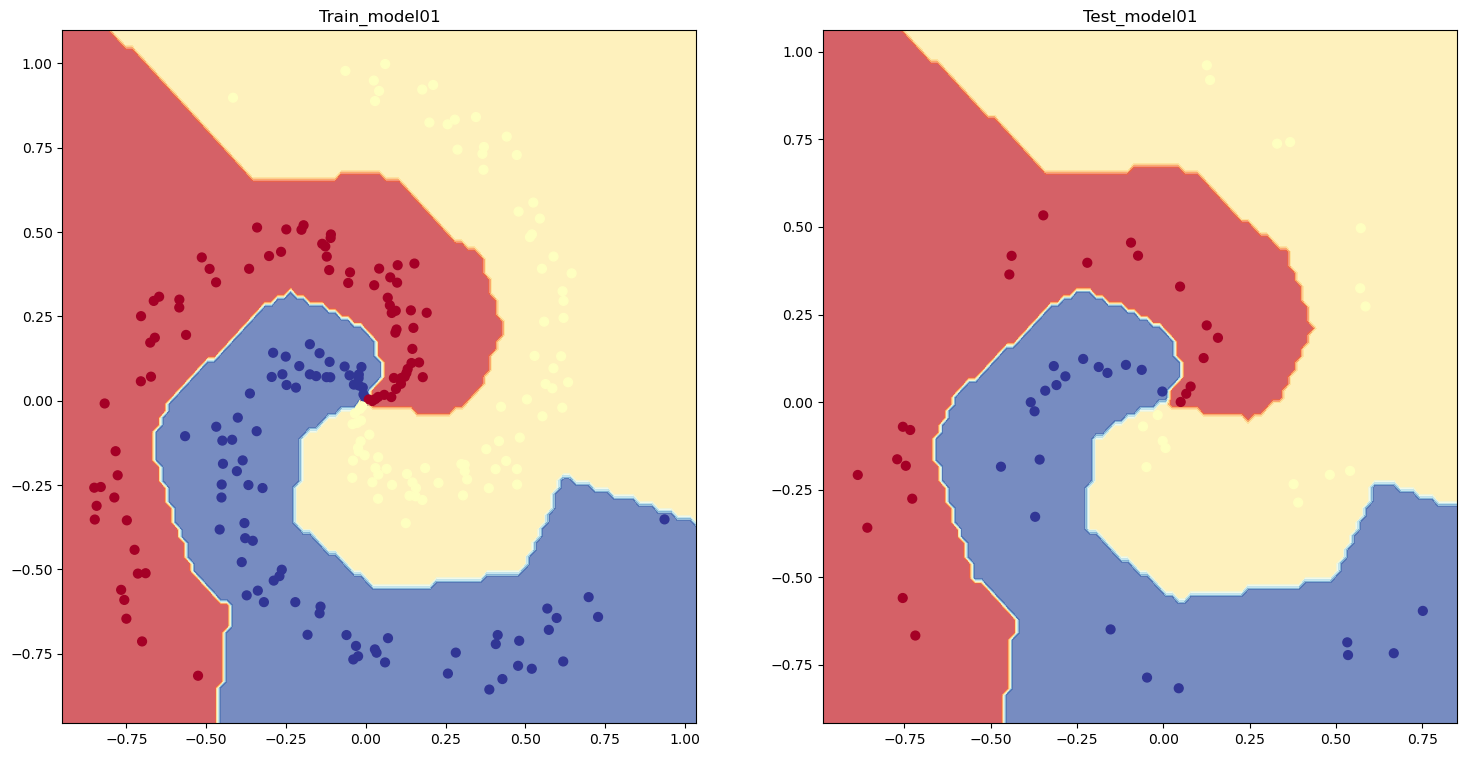

In [94]:
plt.figure(figsize = (18,9))
plt.subplot(1,2,1)
plt.title('Train_model01')
plot_decision_boundary(multi_model,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test_model01')
plot_decision_boundary(multi_model,X_test,y_test)